# Dataset Loading For visualization

In [ ]:
import os
import numpy as np
import scipy.io as sio
from tqdm import tqdm

# Function to pad data to match the target number of features
def pad_features(data, target_size=16):
    current_size = data.shape[1]
    if current_size < target_size:
        # Pad with zeros to match the target feature size
        return np.pad(data, ((0, 0), (0, target_size - current_size)), mode='constant')
    return data

# Function to load data from a single file
def load_data(file_path, target_feature_size=16):
    data = sio.loadmat(file_path)
    emg_data = data['emg']
    glove_data = data['glove']
    labels = data['restimulus']

    # Pad EMG data
    emg_data = pad_features(emg_data, target_size=target_feature_size)

    # Pad glove data
    glove_data = pad_features(glove_data, target_size=target_feature_size)

    return emg_data, glove_data, labels

# Function to load data from all subfolders
def load_all_data_from_subfolders(main_directory, target_feature_size=16):
    emg_data_all, glove_data_all, labels_all = [], [], []

    subfolders = ['DB1', 'DB5']
    for subfolder in subfolders:
        subfolder_path = os.path.join(main_directory, subfolder)
        file_names = [file for file in os.listdir(subfolder_path) if file.endswith('.mat')]

        for file_name in tqdm(file_names, desc=f"Loading Data from {subfolder}"):
            emg_data, glove_data, labels = load_data(os.path.join(subfolder_path, file_name), target_feature_size)
            emg_data_all.append(emg_data)
            glove_data_all.append(glove_data)
            labels_all.append(labels)

    # Concatenate all data along the first axis
    emg_data_all = np.vstack(emg_data_all)
    glove_data_all = np.vstack(glove_data_all)
    labels_all = np.concatenate(labels_all, axis=0)

    return emg_data_all, glove_data_all, labels_all

main_directory = "/content/drive/MyDrive/Final Year Project/Dataset"
emg_data, glove_data, labels = load_all_data_from_subfolders(main_directory)


Loading Data from DB5: 100%|██████████| 30/30 [00:20<00:00,  1.46it/s]


# Data Visualization

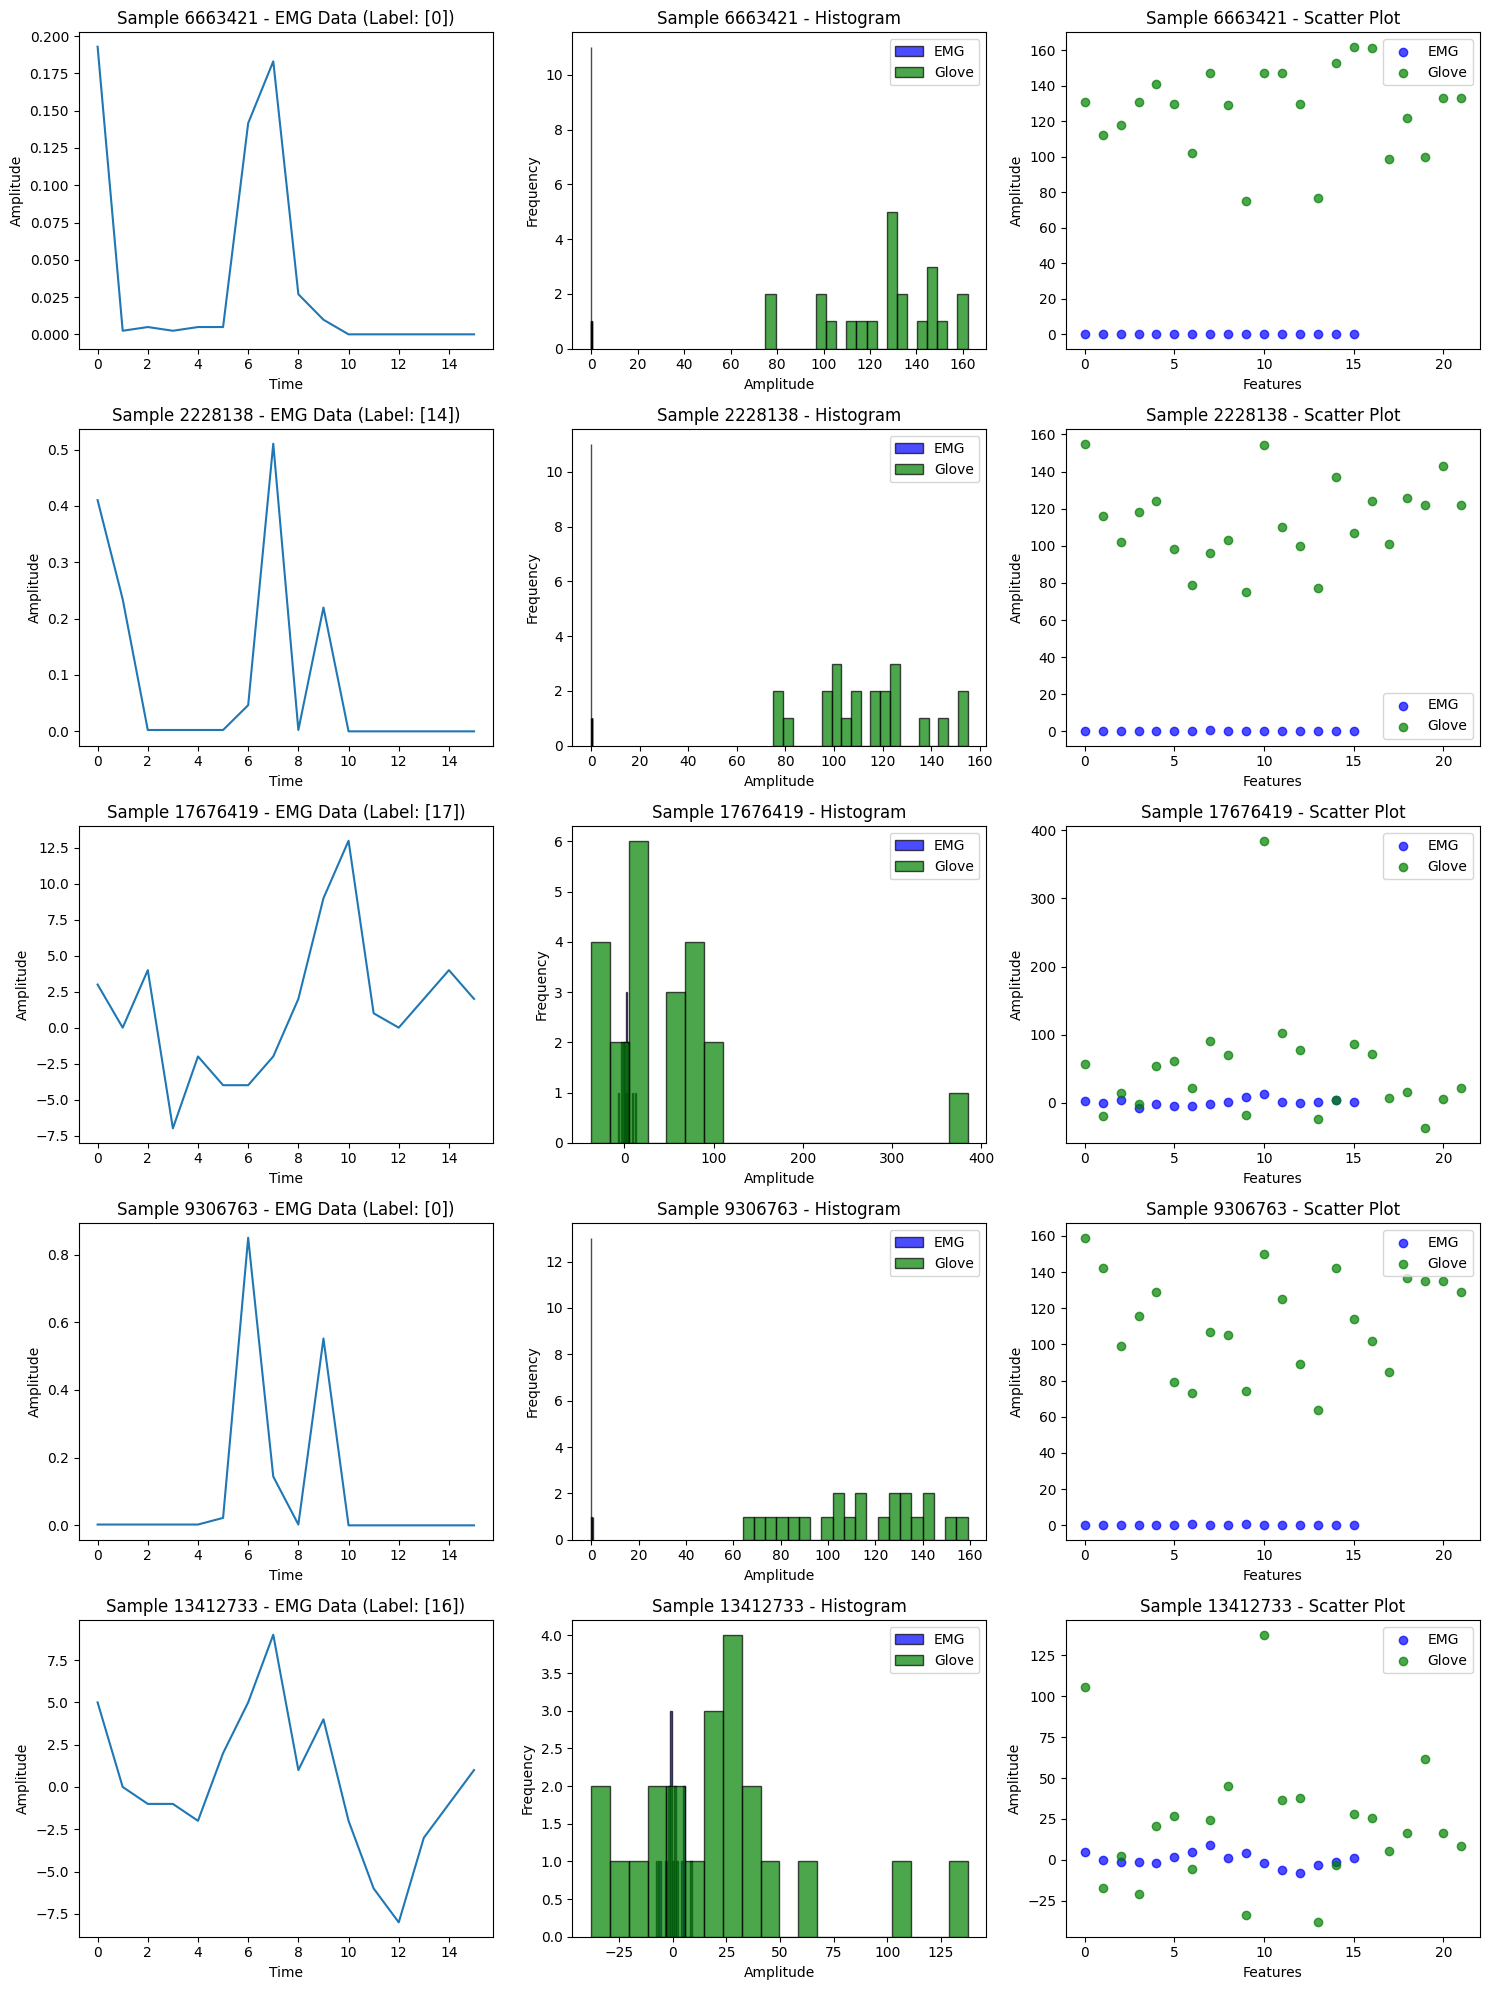

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_data(emg_data, glove_data, labels, num_samples=5):
    """
    Visualize random samples of EMG and glove data with their corresponding labels.
    Includes line plots, histograms, and scatter plots.

    Args:
        emg_data (numpy.ndarray): EMG data array of shape (n_samples, n_features).
        glove_data (numpy.ndarray): Glove data array of shape (n_samples, n_features).
        labels (numpy.ndarray): Labels array of shape (n_samples,).
        num_samples (int): Number of samples to visualize.
    """
    sample_indices = np.random.choice(len(emg_data), num_samples, replace=False)
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 4))

    for i, idx in enumerate(sample_indices):
        # Plot EMG data (line plot)
        axes[i, 0].plot(emg_data[idx])
        axes[i, 0].set_title(f"Sample {idx} - EMG Data (Label: {labels[idx]})")
        axes[i, 0].set_xlabel("Time")
        axes[i, 0].set_ylabel("Amplitude")

        # Plot histogram of EMG and glove data
        axes[i, 1].hist(emg_data[idx], bins=20, alpha=0.7, label='EMG', color='blue', edgecolor='black')
        axes[i, 1].hist(glove_data[idx], bins=20, alpha=0.7, label='Glove', color='green', edgecolor='black')
        axes[i, 1].set_title(f"Sample {idx} - Histogram")
        axes[i, 1].set_xlabel("Amplitude")
        axes[i, 1].set_ylabel("Frequency")
        axes[i, 1].legend()

        # Scatter plot comparing EMG and glove data
        axes[i, 2].scatter(range(len(emg_data[idx])), emg_data[idx], label='EMG', color='blue', alpha=0.7)
        axes[i, 2].scatter(range(len(glove_data[idx])), glove_data[idx], label='Glove', color='green', alpha=0.7)
        axes[i, 2].set_title(f"Sample {idx} - Scatter Plot")
        axes[i, 2].set_xlabel("Features")
        axes[i, 2].set_ylabel("Amplitude")
        axes[i, 2].legend()

    plt.tight_layout()
    plt.show()


visualize_data(emg_data, glove_data, labels, num_samples=5)


# Heat Map Before Preprocessing

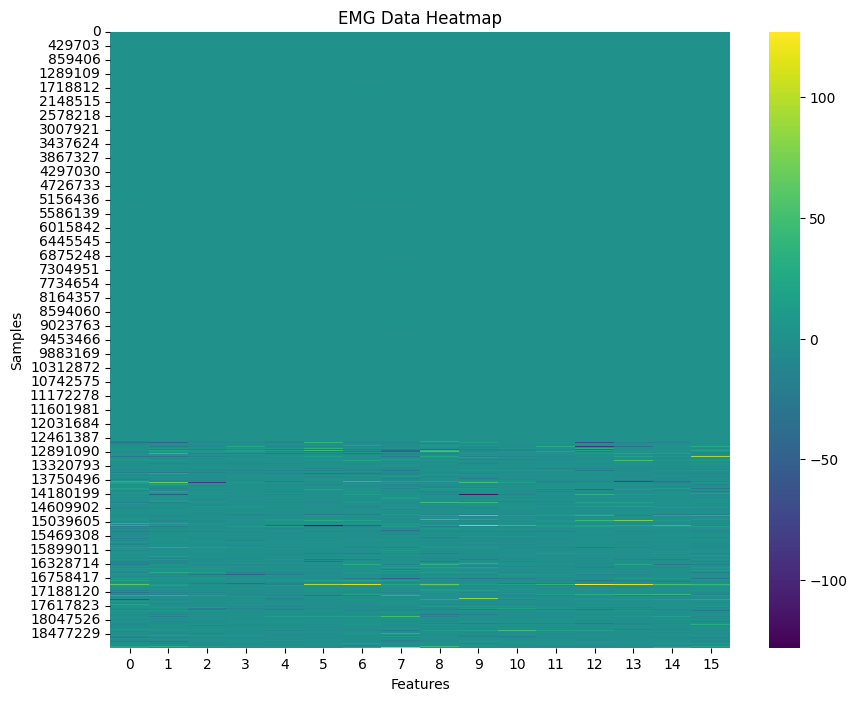

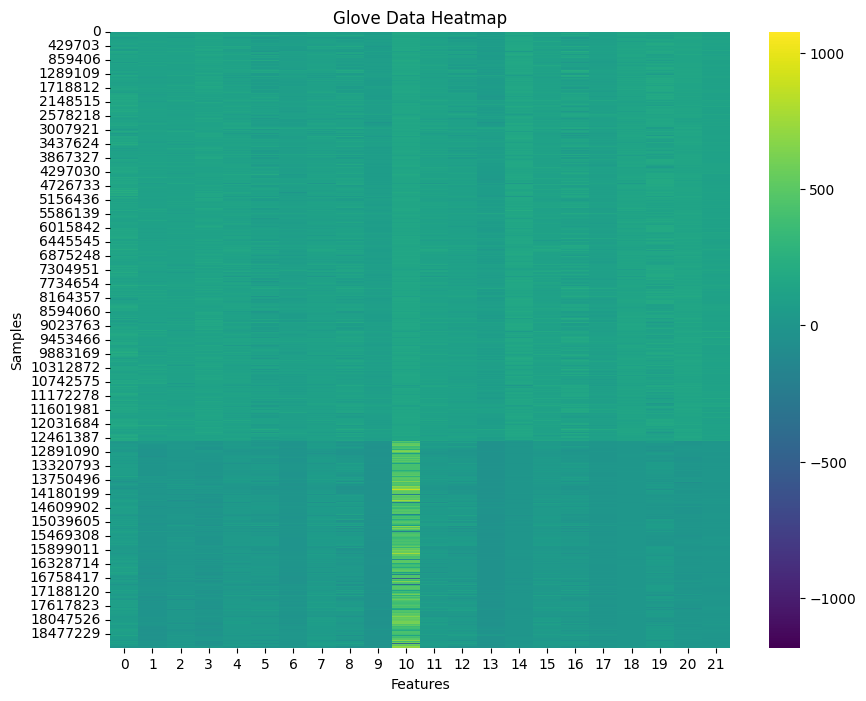

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(data, title="Heatmap", xlabel="Features", ylabel="Samples"):
    """
    Generate a heatmap for the given dataset.

    Args:
        data (numpy.ndarray): Data to visualize as a heatmap (e.g., EMG or glove data).
        title (str): Title of the heatmap.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """

    plt.figure(figsize=(10, 8))
    sns.heatmap(data, cmap="viridis", cbar=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example: Generate a heatmap for EMG data
plot_heatmap(emg_data, title="EMG Data Heatmap")

# Example: Generate a heatmap for Glove data
plot_heatmap(glove_data, title="Glove Data Heatmap")


# Heat Map After Preprocessing

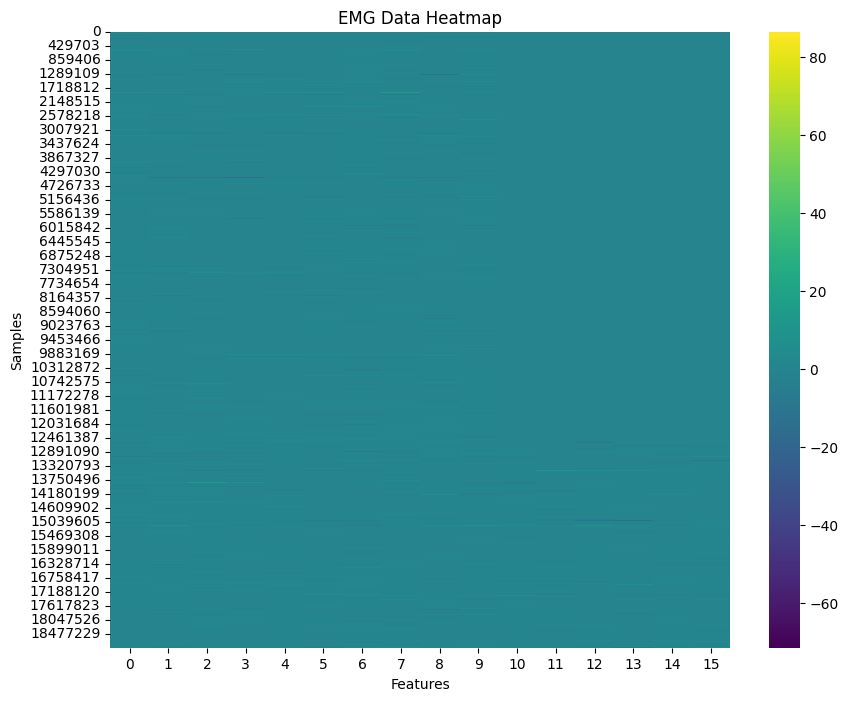

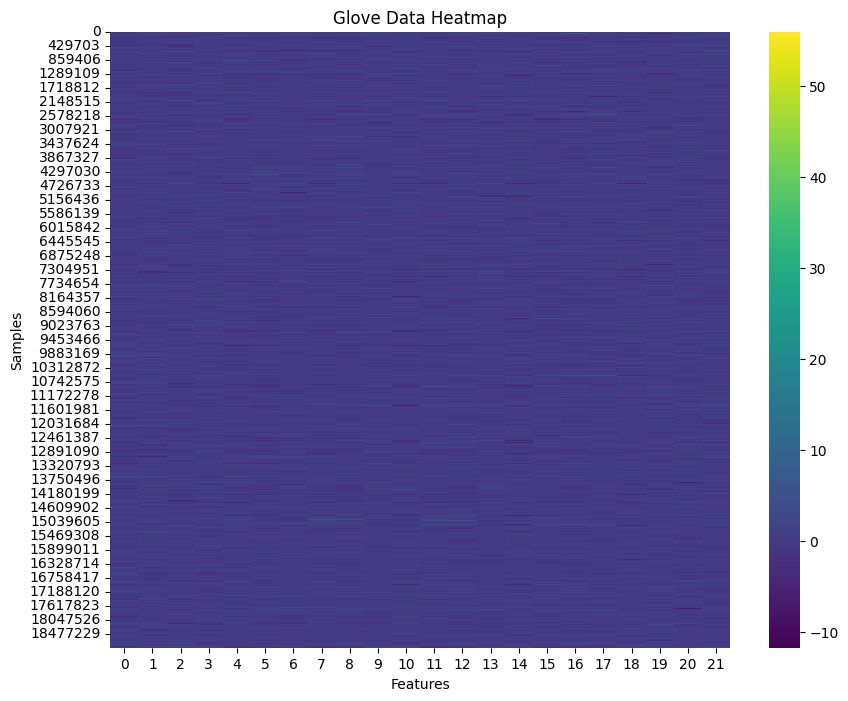

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(data, title="Heatmap", xlabel="Features", ylabel="Samples"):
    """
    Generate a heatmap for the given dataset.

    Args:
        data (numpy.ndarray): Data to visualize as a heatmap (e.g., EMG or glove data).
        title (str): Title of the heatmap.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, cmap="viridis", cbar=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example: Generate a heatmap for EMG data
plot_heatmap(emg_data, title="EMG Data Heatmap")

# Example: Generate a heatmap for Glove data
plot_heatmap(glove_data, title="Glove Data Heatmap")
